# Benford  for Python

### This little module is an attempt to facilitate the performance of Benford's Law-related tests by people using Python, whether interactively or in an automated, scripting way.
### It is open source, licensed under the GNU General Public License version 3.
### It is based on pandas and uses some numpy, and matplotlib for plotting. I've been testing in Python 2 and 3, so feel free to file a bug report if you run into some trouble.

# Installation

### Since it is still a small module file (benford.py), not a package, you can git clone the repo and copy  or move the file around, preferably to the folder where you data is in.
### I like to cd into the site-packages subfolder of my python distribution and clone from there. Then I cd into the newly created (cloned) benford folder.
### A full install package solution is being considered. 

# Demo

### First let's import some libraries and the benford module.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_datareader.data as web

import benford as bf

### Quick start

#### Getting some public data, the S&P500 EFT quotes

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01', end='2016-12-31') # get SPY quotes from yahoo! finance

#### Creating simple and log return  columns

In [3]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36697800,224.732324,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,42672500,225.289896,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,64095000,223.427985,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,48696100,223.378214,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,108998300,222.561759,-0.003655,-0.003662


### First Digits Test

#### Let us see if the SPY log retunrs conforms to Benford's Law 

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.


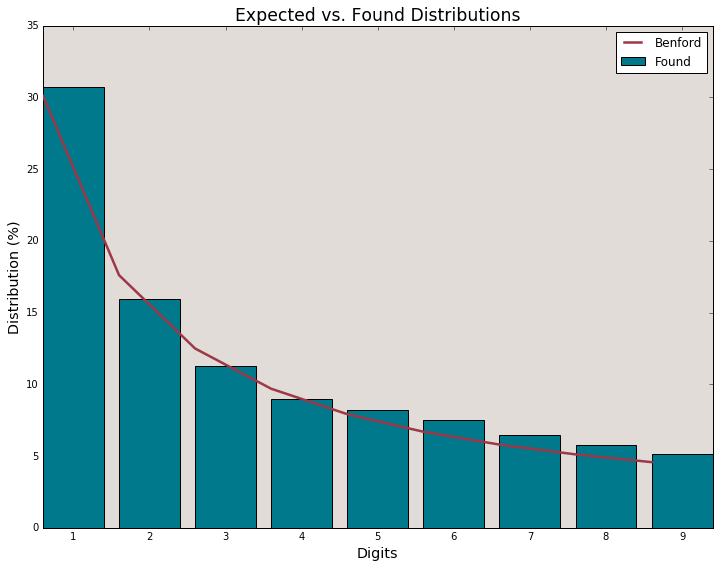

In [4]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8)

#### The *first_digits* function draws the plot (default) with bars fot the digits found frequencies and a line corresponding to the expected Benford proportions. 

#### It also returns a DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.

In [7]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,1832,0.306971,0.301030
2,950,0.159182,0.176091
3,675,0.113103,0.124939
4,535,0.089645,0.096910
5,491,0.082272,0.079181
6,449,0.075235,0.066947
7,385,0.064511,0.057992
8,343,0.057473,0.051153
9,308,0.051609,0.045757


### First Two Digist

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.


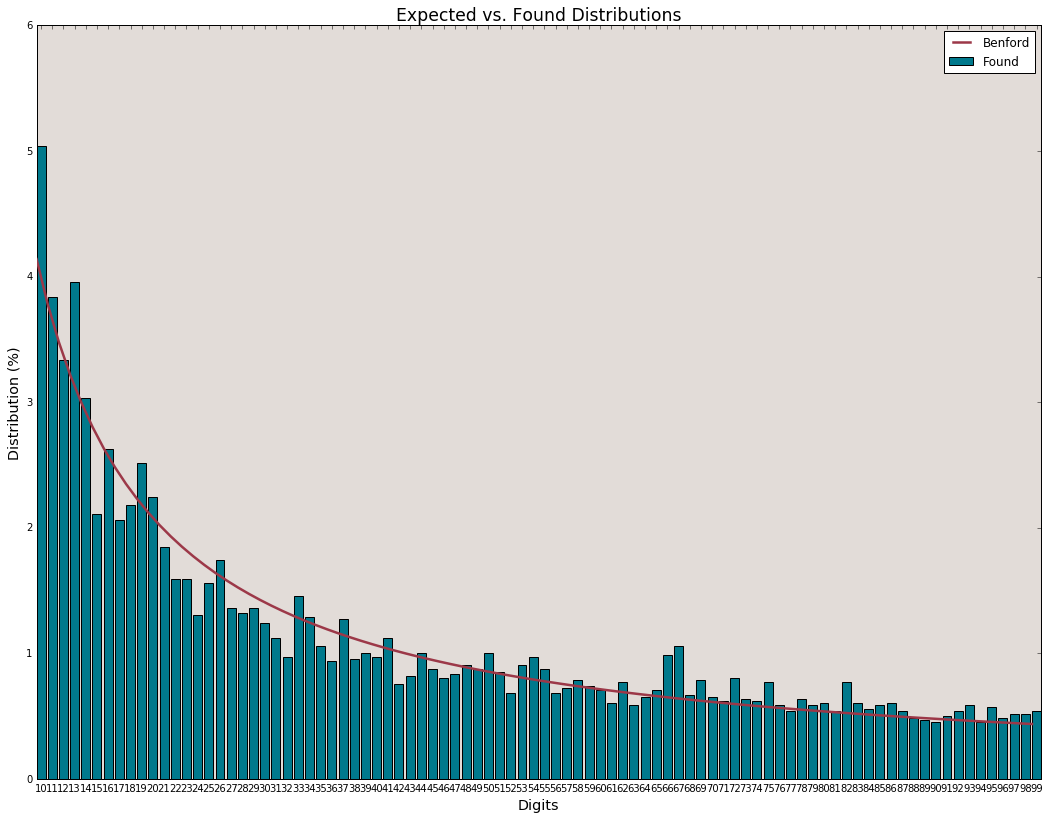

In [5]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8) # Note the parameter digs=2!

In [6]:
f2d.head()

,Counts,Found,Expected
First_2_Dig,,,
10,301,0.050436,0.041393
11,229,0.038371,0.037789
12,199,0.033345,0.034762
13,236,0.039544,0.032185
14,181,0.030328,0.029963


In [7]:
f2d.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,34,0.005697,0.004548
96,29,0.004859,0.004501
97,31,0.005194,0.004454
98,31,0.005194,0.004409
99,32,0.005362,0.004365


### Assessing concormity

#### There a bunch of tests to more precisely evaluate if the data studied is a good fit to Benford's Law.

#### The first we'll use is the Z statistic for the proportions.
#### In the module digits functions, you ca turn it on by settign the parameter *Z_conf_level*, which will tell the function which confidence level to consider after calculating the Z score for each proportion. Let's see.

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010556  3.901955
10           0.041393  0.050436  3.474570
13           0.032185  0.039544  3.184730
66           0.006531  0.009886  3.137524
82           0.005264  0.007708  2.519182
72           0.005990  0.008043  1.970986


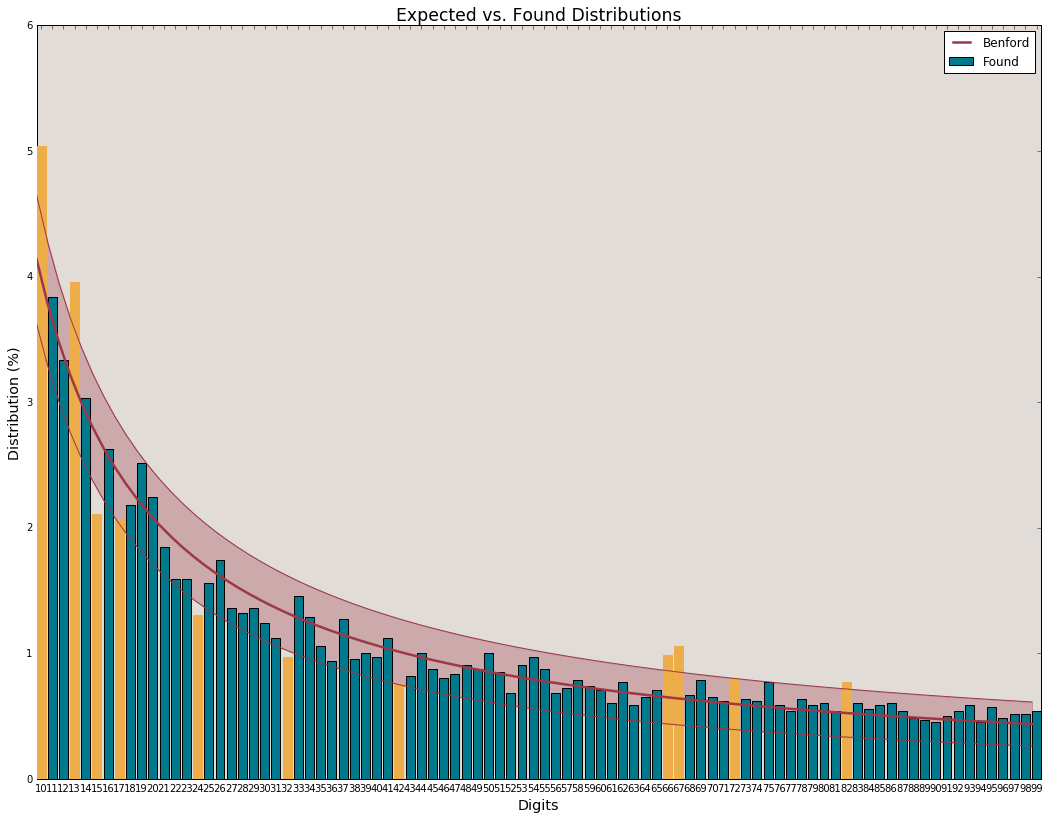

In [8]:
# For a significance of 5%, a confidence of 95
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, Z_conf_level=95)

### Some things happened:
#### <li>It printed a DataFrame wiith the most significant positive deviations, in descending order of the Z score.</li>
#### <li>In the plot, to the Benford Expected line, it added upper and lower boundaries, based on the confidence level set to theh *Z_conf_level* parameter. Accordingly, it changed the colors of the bars whose proportions fell lower or higher than the drwan boundaries, for better vizualisation.</li>

### Other tests

#### We can do all this with the *First Three Digits*, *Second Digit* and the *Last Two Digits* tests.

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_3_Dig                              
952          0.000456  0.001676  4.110387
962          0.000451  0.001508  3.539604
862          0.000504  0.001508  3.170624
997          0.000435  0.001340  3.041483
823          0.000527  0.001508  3.017908
945          0.000459  0.001340  2.874850
139          0.003113  0.005194  2.769750
751          0.000578  0.001508  2.720614
171          0.002532  0.004357  2.675262
874          0.000497  0.001340  2.635545


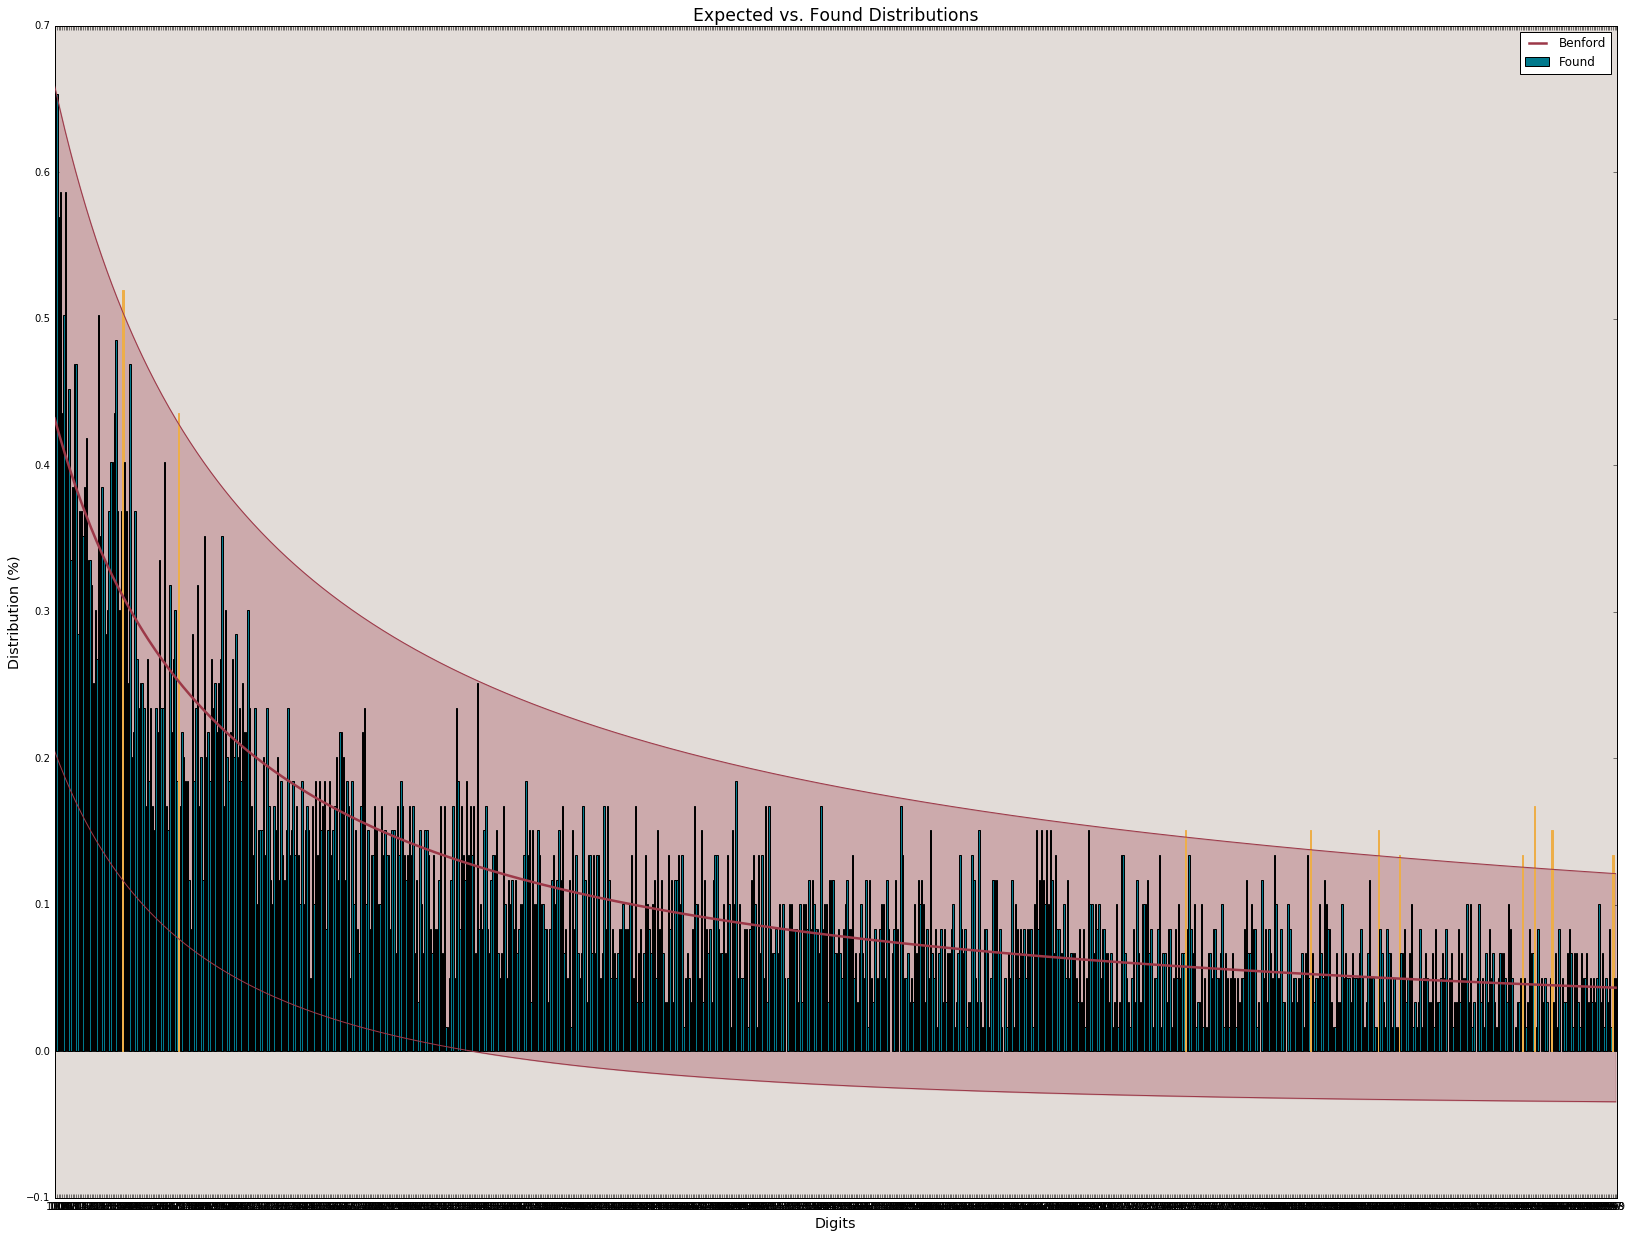

In [16]:
# First Three Digits Test, now with 99% confidence level
f3d = bf.first_digits(sp.l_r, digs=3, decimals=8, Z_conf_level=99)

In [17]:
# The plot is better seen and zoomed in and out without the inline plotting.
# Try %matplotlib

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.129189  2.243417


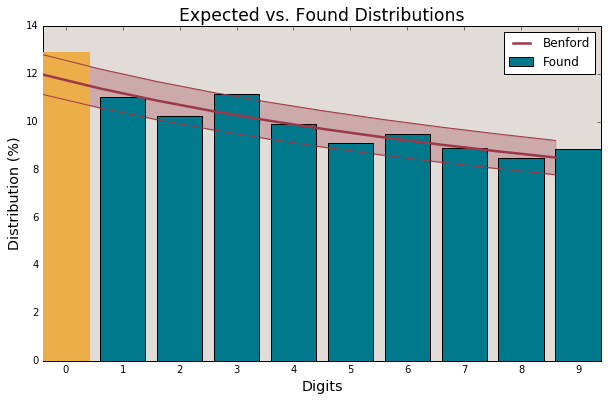

In [10]:
# Second Digit Test
sd = bf.second_digit(sp.l_r, decimals=8, Z_conf_level=95)

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
85          0.010101  0.013572  2.617147
97          0.010101  0.013572  2.617147
37          0.010101  0.013405  2.487695
56          0.010101  0.013237  2.358244
9           0.010101  0.012735  1.969889


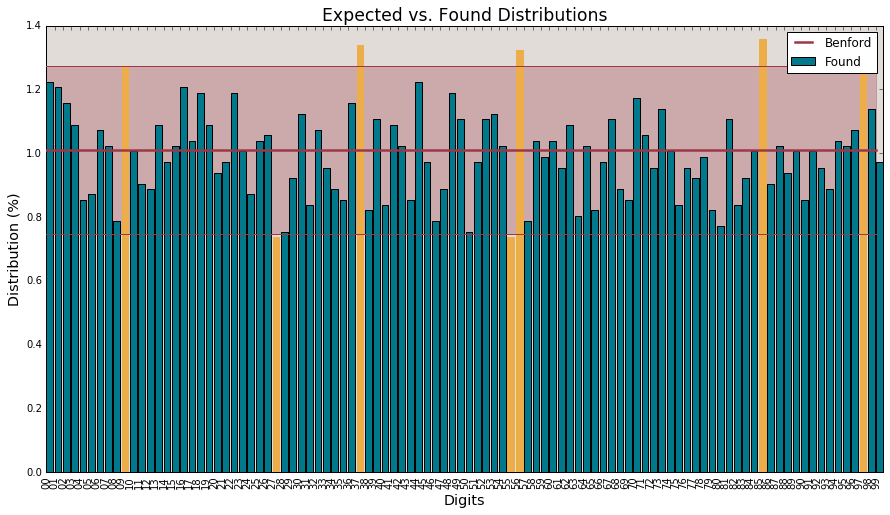

In [11]:
# Last Two Digits Test
l2d = bf.last_two_digits(sp.l_r, decimals=8, Z_conf_level=95)

### This is the instantiation of the object that will be the base for all further tests.
### Some important notes about the parameters:
### <li>The "sign" parameter tells the module which numbers to consider, negative (neg), postive (pos) or both (all)</li>
### <li>The "dec" parameter tells the module how many decimal places to consider. The defalut is 2, for Analysis with currencies. In this case, since the log return has many decimal places, I set it to 8. If integer, set it to 0.</li>